In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def u(x, y, a_1, b_1):
    numerator = a_1 * y
    denominator = 1/(1 + b_1 * x)
    fraction = numerator * denominator
    return x * (2 - x - fraction)


def v(x_new, y, z, a_1, a_2, b_1, b_2, d_1):
    numerator_x = a_1 * x_new
    denominator_x = 1/(1 + b_1 * x_new)
    fraction_x = numerator_x * denominator_x
    ###################################################
    numerator_y = a_2 * z
    denominator_y = 1/(1 + b_2 * y)
    fraction_y = numerator_y * denominator_y
    return y * (np.exp(-d_1) + fraction_x - fraction_y)


def w(y_new, z, a_2, b_2, d_2):
    numerator = a_2 * y_new
    denominator = 1/(1 + b_2 * y_new)
    fraction = numerator * denominator
    return z * (np.exp(-d_2) + fraction)

In [3]:
def _calculate_next_step_2_sites(array, a_1, a_2, b_1, b_2, d_1, d_2, D_x, D_y, D_z):
    """This function calculates one interaction of the HPM equations for 2 sites with migration between then.

    Args:
        array (Array): 2D array containing the x, y and z values for the species for both sides. It's assumed that this array is in the form of
        [[x_1,x_2],[y_1,y_2],[z_1,z_2]].
        a_1 (Float): The value of the a_1 param;
        a_2 (Float): The value of the a_2 param;
        b_1 (Float): The value of the a_1 param;
        b_2 (Float): The value of the b_2 param;
        d_1 (Float): The value of the d_1 param;
        d_2 (Float): The value of the d_2 param;
        D_x (float or Array-like): The migration coefficient of the x species between site 1 and 2. This can be an float if the
        migration is equal between the sites, or it can be an array with 2 values: [D_z12, D_z21] where the indicies correspond to the migration i->j
        D_y (float or Array-like): The migration coefficient of the y species between site 1 and 2. This can be an float if the
        migration is equal between the sites, or it can be an array with 2 values: [D_y12, D_y21] where the indicies correspond to the migration i->j
        D_z (float or Array-like): The migration coefficient of the z species between site 1 and 2. This can be an float if the
        migration is equal between the sites, or it can be an array with 2 values: [D_z12, D_z21] where the indicies correspond to the migration i->j

    Returns:
        Returns a 2D array containing the new values of x, y and z, in this order, for both sites.
    """
    x = array[0]
    y = array[1]
    z = array[2]
    x_new = u(x, y, a_1, b_1) + D_x * np.array([x[1] - x[0], x[0] - x[1]], dtype=float)
    y_new = v(x_new, y, z, a_1, a_2, b_1, b_2, d_1) + D_y * np.array(
        [y[1] - y[0], y[0] - y[1]], dtype=float
    )
    z_new = w(y_new, z, a_2, b_2, d_2) + D_z * np.array(
        [z[1] - z[0], z[0] - z[1]], dtype=float
    )
    return np.array([x_new, y_new, z_new], dtype=float)


def integrate_2_sites_system(initial_conditions, number_steps, params):
    """This function solves a 2 sites HPM system of equations with migration bewtween then. The time step used is 1 and it returns the solution
    for each time t.

    Args:
        initial_cond (Array): 2D array with the initial conditions for each species in each site, i.e.,
        [[x_1(0), x_2(0)],[y_1(0),y_2(0)],[z_1(0),z_2(0)]].
        number_steps (int): The number of iterations.
        params (Array-like): An array containing the parameters of the system.

    Returns:
        Returns the solution of the system in the form: [[x_sol], [y_sol], [z_sol]] where x_sol is a matrix of the form
        [[x_1(0), x_2(0)], [x_1(1), x_2(2)],...] and so on.
    """
    a_1, a_2, b_1, b_2, d_1, d_2, D_x, D_y, D_z = params
    x_matrix = []
    y_matrix = []
    z_matrix = []
    species_matrix = initial_conditions
    for k in range(number_steps):
        x_matrix.append(species_matrix[0])
        y_matrix.append(species_matrix[1])
        z_matrix.append(species_matrix[2])
        species_matrix = _calculate_next_step_2_sites(
            species_matrix, a_1, a_2, b_1, b_2, d_1, d_2, D_x, D_y, D_z
        )
    return np.array([x_matrix, y_matrix, z_matrix])

In [8]:
seed_2_sites = 173794472965835828579391201983769539881
generator_2_sites = np.random.default_rng(seed=seed_2_sites)
initial_cond_2_sites = np.array([[0.820, 0.820], [0.124, 0.124], [10.056, 10.056]])
noise_2_sites = generator_2_sites.uniform(
    -0.05 * initial_cond_2_sites, 0.05 * initial_cond_2_sites
)
initial_cond_2_sites = initial_cond_2_sites + noise_2_sites
params_2_sites = (5, 0.1, 3.2, 2, 0.4, 0.01, 0.5, 0., 0.5)
number_of_steps_2_sites = 1000
time = np.arange(0, number_of_steps_2_sites, 1)
x_matrix_2_sites, y_matrix_2_sites, z_matrix_2_sites = integrate_2_sites_system(
    initial_cond_2_sites, number_of_steps_2_sites, params_2_sites
)

# Plot dos Resultados

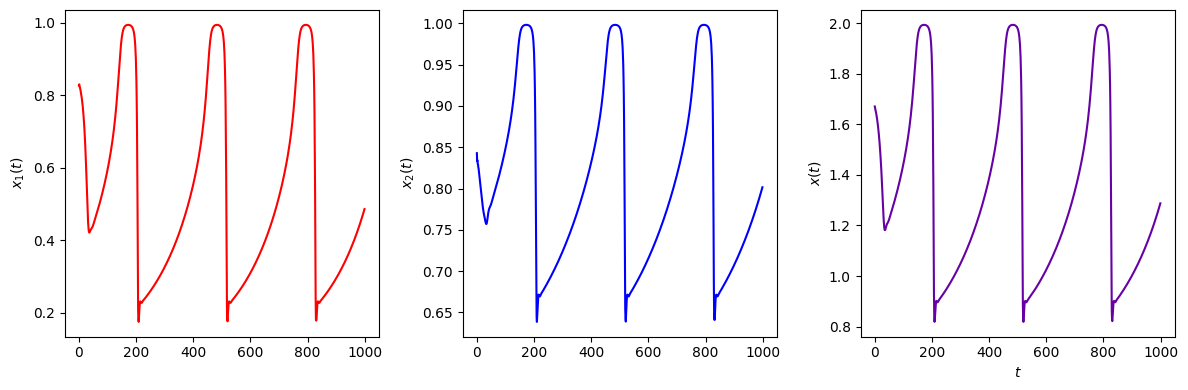

In [9]:
fig_2_sites, ax_2_sites = plt.subplots(1, 3, figsize=(12, 4))
ax_2_sites[0].plot(time[:1000], x_matrix_2_sites[:1000, 0], color="red")
ax_2_sites[1].plot(time[:1000], x_matrix_2_sites[:1000, 1], color="blue")
ax_2_sites[2].plot(
    time[:1000],
    x_matrix_2_sites[:1000, 0] + x_matrix_2_sites[:1000, 1],
    color="#6601A4",
)
ax_2_sites[2].set_xlabel("$t$")
plt.subplots_adjust(hspace=0.5)
ax_2_sites[0].set_ylabel("$x_1(t)$")
ax_2_sites[1].set_ylabel("$x_2(t)$")
ax_2_sites[2].set_ylabel("$x(t)$")
plt.tight_layout()

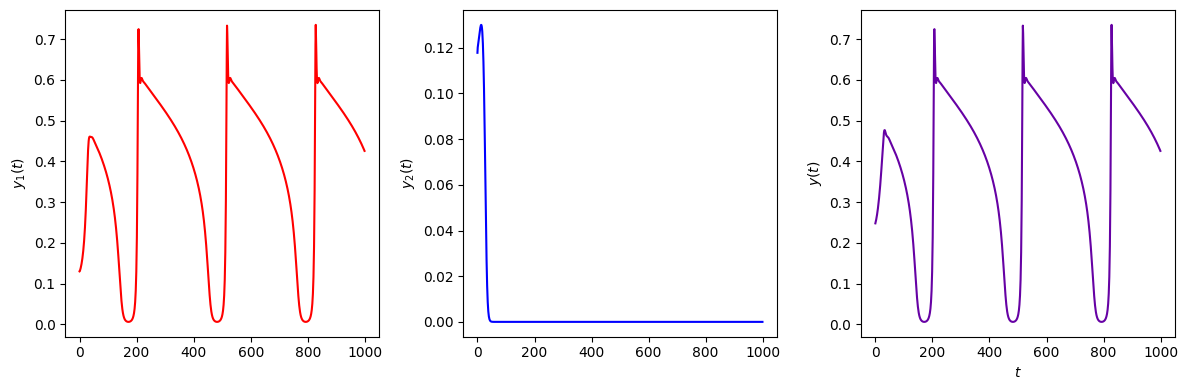

In [10]:
fig_2_sites, ax_2_sites = plt.subplots(1, 3, figsize=(12, 4))
ax_2_sites[0].plot(time[:1000], y_matrix_2_sites[:1000, 0], color="red")
ax_2_sites[1].plot(time[:1000], y_matrix_2_sites[:1000, 1], color="blue")
ax_2_sites[2].plot(
    time[:1000],
    y_matrix_2_sites[:1000, 0] + y_matrix_2_sites[:1000, 1],
    color="#6601A4",
)
ax_2_sites[2].set_xlabel("$t$")
plt.subplots_adjust(hspace=0.5)
ax_2_sites[0].set_ylabel("$y_1(t)$")
ax_2_sites[1].set_ylabel("$y_2(t)$")
ax_2_sites[2].set_ylabel("$y(t)$")
plt.tight_layout()

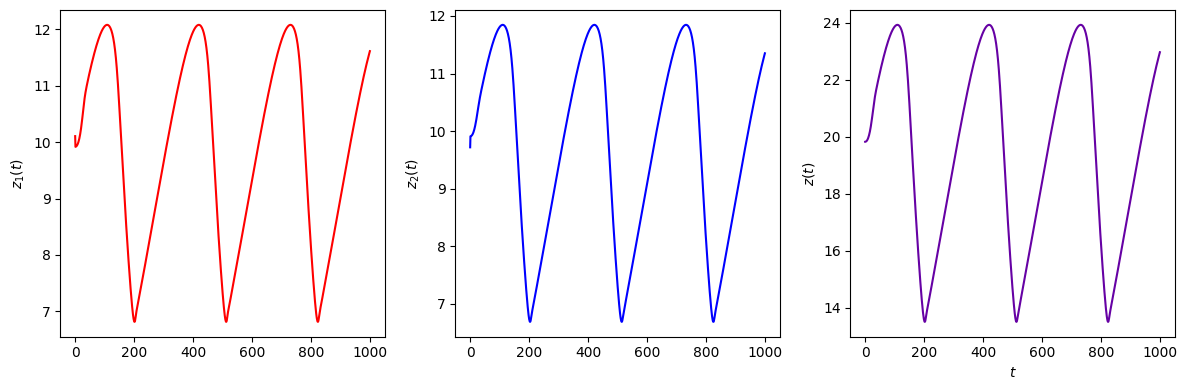

In [11]:
fig_2_sites, ax_2_sites = plt.subplots(1, 3, figsize=(12, 4))
ax_2_sites[0].plot(time[:1000], z_matrix_2_sites[:1000, 0], color="red")
ax_2_sites[1].plot(time[:1000], z_matrix_2_sites[:1000, 1], color="blue")
ax_2_sites[2].plot(
    time[:1000],
    z_matrix_2_sites[:1000, 0] + z_matrix_2_sites[:1000, 1],
    color="#6601A4",
)
ax_2_sites[2].set_xlabel("$t$")
ax_2_sites[0].set_ylabel("$z_1(t)$")
ax_2_sites[1].set_ylabel("$z_2(t)$")
ax_2_sites[2].set_ylabel("$z(t)$")
plt.tight_layout()

In [12]:
%matplotlib inline

Text(0.5, 0, '$z$')

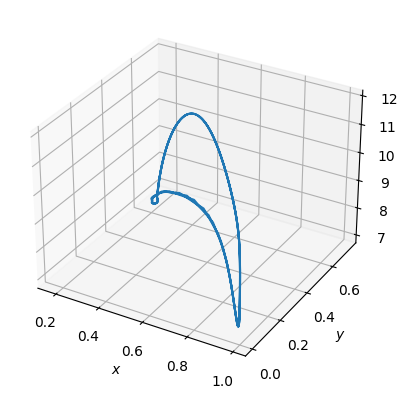

In [13]:
#%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
_ = ax.plot(x_matrix_2_sites[100:1000, 0], y_matrix_2_sites[100:1000, 0], z_matrix_2_sites[100:1000, 0])
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")